<a href="https://colab.research.google.com/github/Manujk-123/Marvel-Task-Level-1/blob/main/ID3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ID3(Iterative Dichotomiser 3)**

The **ID3 (Iterative Dichotomiser 3)**algorithm is a machine learning algorithm used for generating decision trees, which are used for classification tasks. It was developed by **Ross Quinlan in 1986**. ID3 is a type of supervised learning algorithm that learns a model based on labeled training data.</br>
###**Key Concepts**</br>
- **Entropy:** is a measure of uncertainty or disorder in the data. The goal is to reduce entropy by selecting the best attribute for splitting.</br>The formula for entropy
𝐻
(
𝑆
) for a dataset
S with possible classes is:</br>
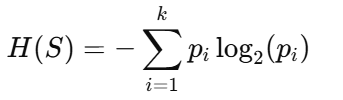
- **Information Gain:**measures how much uncertainty is reduced by choosing a particular attribute to split the data. It is calculated as the difference between the entropy of the dataset before and after the split.</br>The formula for information gain
𝐼
𝐺
(
𝑆
,
𝐴
) when splitting dataset
𝑆 by attribute
𝐴
is:</br>
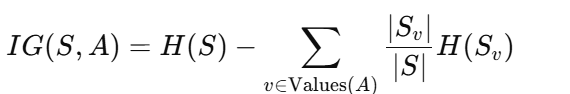


Consider a weather dataset with attributes like "Outlook", "Temperature", "Humidity", and "Wind" to predict whether people play tennis or not.

In [ ]:
import math
import pandas as pd

# Sample weather dataset (this would typically be a larger dataset)
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

# Convert to pandas DataFrame
df = pd.DataFrame(data)

# Function to calculate entropy
def entropy(data):
    # Count the frequency of each class label
    class_counts = data.value_counts()
    # Calculate the probability of each class
    probabilities = class_counts / len(data)
    # Compute entropy
    entropy_value = -sum(probabilities * probabilities.apply(lambda p: math.log2(p) if p > 0 else 0))
    return entropy_value

# Function to calculate information gain
def information_gain(data, attribute, target):
    # Calculate the total entropy of the target
    total_entropy = entropy(data[target])

    # Calculate the weighted entropy for each attribute value
    values = data[attribute].unique()
    weighted_entropy = 0
    for value in values:
        subset = data[data[attribute] == value]
        weighted_entropy += (len(subset) / len(data)) * entropy(subset[target])

    # Information Gain = Total Entropy - Weighted Entropy
    return total_entropy - weighted_entropy

# Function to build the ID3 decision tree
def id3(data, attributes, target):
    # If all examples are in the same class, return that class label
    if len(data[target].unique()) == 1:
        return data[target].iloc[0]

    # If no attributes left, return the majority class
    if len(attributes) == 0:
        return data[target].mode()[0]

    # Select the attribute with the highest information gain
    gains = {attribute: information_gain(data, attribute, target) for attribute in attributes}
    best_attribute = max(gains, key=gains.get)

    # Create a decision node
    tree = {best_attribute: {}}

    # Remove the best attribute from the list of attributes
    remaining_attributes = [attr for attr in attributes if attr != best_attribute]

    # Recursively create branches for each value of the best attribute
    for value in data[best_attribute].unique():
        subset = data[data[best_attribute] == value]
        tree[best_attribute][value] = id3(subset, remaining_attributes, target)

    return tree

# Define target column and attributes
target = 'PlayTennis'
attributes = ['Outlook', 'Temperature', 'Humidity', 'Wind']

# Build the decision tree
decision_tree = id3(df, attributes, target)
print(decision_tree)


{'Outlook': {'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}}, 'Overcast': 'Yes', 'Rainy': {'Wind': {'Weak': 'Yes', 'Strong': 'No'}}}}


To visualize the decision tree generated by the ID3 algorithm, we can use the **graphviz** library in Python. It allows us to create and render the tree in a graphical format.</br>
- **graphviz** (to render the tree),
- **pydot** (a Python interface to Graphviz).

In [ ]:
#install graphviz
!apt-get -y install graphviz



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
!pip install graphviz pydot

In [ ]:
!dot -V

dot - graphviz version 2.43.0 (0)


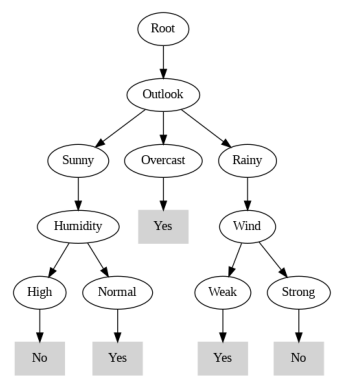

In [ ]:
import math
import pandas as pd
import graphviz
from PIL import Image
import matplotlib.pyplot as plt

# Sample weather dataset (this would typically be a larger dataset)
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

# Convert to pandas DataFrame
df = pd.DataFrame(data)

# Function to calculate entropy
def entropy(data):
    # Count the frequency of each class label
    class_counts = data.value_counts()
    # Calculate the probability of each class
    probabilities = class_counts / len(data)
    # Compute entropy
    entropy_value = -sum(probabilities * probabilities.apply(lambda p: math.log2(p) if p > 0 else 0))
    return entropy_value

# Function to calculate information gain
def information_gain(data, attribute, target):
    # Calculate the total entropy of the target
    total_entropy = entropy(data[target])

    # Calculate the weighted entropy for each attribute value
    values = data[attribute].unique()
    weighted_entropy = 0
    for value in values:
        subset = data[data[attribute] == value]
        weighted_entropy += (len(subset) / len(data)) * entropy(subset[target])

    # Information Gain = Total Entropy - Weighted Entropy
    return total_entropy - weighted_entropy

# Function to build the ID3 decision tree
def id3(data, attributes, target):
    # If all examples are in the same class, return that class label
    if len(data[target].unique()) == 1:
        return data[target].iloc[0]

    # If no attributes left, return the majority class
    if len(attributes) == 0:
        return data[target].mode()[0]

    # Select the attribute with the highest information gain
    gains = {attribute: information_gain(data, attribute, target) for attribute in attributes}
    best_attribute = max(gains, key=gains.get)

    # Create a decision node
    tree = {best_attribute: {}}

    # Remove the best attribute from the list of attributes
    remaining_attributes = [attr for attr in attributes if attr != best_attribute]

    # Recursively create branches for each value of the best attribute
    for value in data[best_attribute].unique():
        subset = data[data[best_attribute] == value]
        tree[best_attribute][value] = id3(subset, remaining_attributes, target)

    return tree

# Function to convert the decision tree to a graphviz format for visualization
def visualize_tree(tree, parent_name=None):
    dot = graphviz.Digraph(comment='Decision Tree', format='png')

    def add_nodes_edges(tree, parent_name):
        if isinstance(tree, dict):
            # For each key in the dictionary (attribute)
            for attribute, subtree in tree.items():
                node_name = f"{parent_name}_{attribute}"
                dot.node(node_name, label=attribute)
                if parent_name:
                    dot.edge(parent_name, node_name)
                if isinstance(subtree, dict):
                    add_nodes_edges(subtree, node_name)
                else:
                    leaf_name = f"{node_name}_{subtree}"
                    dot.node(leaf_name, label=subtree, shape="box", style="filled", color="lightgrey")
                    dot.edge(node_name, leaf_name)
        else:
            # If it's a leaf node, no further recursion
            leaf_name = f"{parent_name}_{tree}"
            dot.node(leaf_name, label=tree, shape="box", style="filled", color="lightgrey")
            dot.edge(parent_name, leaf_name)

    add_nodes_edges(tree, parent_name)
    return dot

# Define target column and attributes
target = 'PlayTennis'
attributes = ['Outlook', 'Temperature', 'Humidity', 'Wind']

# Build the decision tree
decision_tree = id3(df, attributes, target)

# Visualize the decision tree
dot = visualize_tree(decision_tree, parent_name="Root")
dot.render("decision_tree")  # Saves the tree as 'decision_tree.png'

# To view the decision tree in the notebook
dot.view()
# Open the saved image and display it
img = Image.open("decision_tree.png")
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()
